In [55]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from time import gmtime, strftime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [56]:
my_path = str(os.getcwd())
X_train = np.load(my_path+'/.data/X_train_surge_new.npz')
Y_train = pd.read_csv(my_path+'/.data/Y_train_surge.csv')
X_test = np.load(my_path+'/.data/X_test_surge_new.npz')

In [57]:
slp = X_train['slp']
print(slp.shape)

(5599, 40, 41, 41)


In [62]:
def slp_to_flat_images(slp):
    l = []
    for x in slp:
        for i in x:
            l.append(i.flatten())
    return np.array(l)

In [18]:
list_flat_images = slp_to_flat_images(slp)
print(list_flat_images.shape)
print(list_flat_images)

(223960, 1681)
[[102389.25 102458.25 102514.25 ... 100334.25 100330.25 100362.25]
 [102365.96 102424.96 102472.96 ... 100181.96 100186.96 100227.96]
 [102259.49 102319.49 102364.49 ...  99996.49 100006.49 100052.49]
 ...
 [101936.81 101947.81 101954.81 ...  99620.81  99581.81  99540.81]
 [101898.95 101907.95 101911.95 ...  99597.95  99542.95  99487.95]
 [101972.53 101984.53 101993.53 ...  99691.53  99620.53  99547.53]]


In [20]:
scaler_images = StandardScaler()
list_flat_images = scaler_images.fit_transform(list_flat_images)
print(list_flat_images)

[[ 0.5648013   0.7482198   0.9100719  ... -0.42519137 -0.42582867
  -0.39631626]
 [ 0.5127081   0.67268294  0.8150797  ... -0.5552119  -0.54834235
  -0.51132655]
 [ 0.27455804  0.43336168  0.56552964 ... -0.71356046 -0.70264506
  -0.6616047 ]
 ...
 [-0.44721434 -0.41002414 -0.3770053  ... -1.0343063  -1.0657507
  -1.0998267 ]
 [-0.5318985  -0.5004698  -0.4756103  ... -1.053823   -1.0989759
  -1.1450975 ]
 [-0.36731836 -0.32670486 -0.28792652 ... -0.9739284  -1.0326457
  -1.0940726 ]]


In [23]:
nb_comp = 100
pca = PCA(n_components=nb_comp)
pca.fit(list_flat_images)

PCA(n_components=100)

[0.2943113  0.24519865 0.14350804 0.08600698 0.07730398 0.02821633
 0.0269145  0.01981695 0.01273959 0.00999616 0.00725849 0.00655057
 0.00586402 0.00390406 0.00336959]


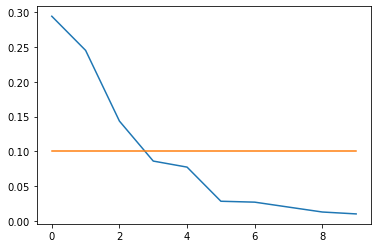

In [42]:
fig1,ax1 = plt.subplots()
ax1.plot(pca.explained_variance_ratio_[:10])
#plt.yscale("log")
ax1.plot([0.1 for _ in range(10)])
print(pca.explained_variance_ratio_[:15])

In [29]:
comp = pca.components_
print(comp)

[[ 0.01583835  0.01680318  0.01771893 ... -0.0243906  -0.02380877
  -0.02322919]
 [-0.00660215 -0.00724224 -0.00787883 ...  0.00687802  0.00662779
   0.00638236]
 [-0.02317929 -0.0235855  -0.02378572 ...  0.01184844  0.012028
   0.01217103]
 ...
 [ 0.03565767  0.02684538  0.02131205 ... -0.01581105 -0.0319219
  -0.04889093]
 [-0.01546676 -0.01064161 -0.01118568 ... -0.0206071  -0.00925419
   0.00507953]
 [-0.00231923  0.01333485  0.02696319 ... -0.0113106  -0.00685163
  -0.00118   ]]


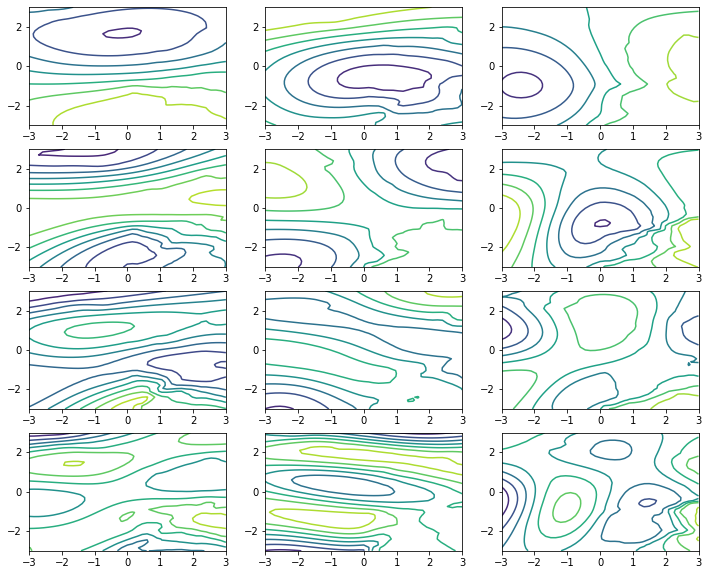

In [34]:
xlist = np.linspace(-3.0, 3.0, 41)
ylist = np.linspace(-3.0, 3.0, 41)
X, Y = np.meshgrid(xlist, ylist)

plt.figure(figsize=(12,10))

for i in range(12):
    plt.subplot(4,3, i+1)
    
    Z = np.reshape(comp[i],(41,41))
    plt.contour(X, Y, Z)


In [77]:
def transform_pca_slp(pca,slp):
    flat = slp_to_flat_images(slp)
    slp_LD = pca.transform(flat)
    slp_LD_reshape = np.array([np.concatenate(slp_LD[i*40:(i+1)*40]) for i in range(len(slp))])
    print(slp_LD.shape)
    print(slp_LD_reshape.shape)
    return slp_LD

def fit_transform_pca_slp(slp,nb_comp):
    #flatter
    list_flat_images = slp_to_flat_images(slp)
    #fit PCA
    pca = PCA(n_components=nb_comp)
    pca.fit(list_flat_images)
    #transform
    slp_LD = transform_pca_slp(pca,slp)
    
    return pca,slp_LD

print(slp.shape)

(5599, 40, 41, 41)


In [78]:
pca,slp_LD = fit_transform_pca_slp(slp,4)
print(np.array(slp.shape))

(223960, 4)
(5599, 160)
[5599   40   41   41]


In [74]:
print(np.array(slp_LD).shape)

(223960, 4)
